In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
heights_scores_df = pd.read_excel('heights_scores.xlsx')
heights_scores_df.head()

,chromosome,name,position,sequence,strand,Orc4 WT,"F485A,Y486A","F485Y,Y486F",N489A,Y486Q,...,R478K,N489W,WT_Score,Y486Q_Score,F485I_Score,N489A_Score,R478A_Score,F485A_Y486A_Score,F485I_Y486Q_Score,F485Y_Y486F_Score
0,chr1,ARS104.0,31002,ATTTTTAAGTTTTGT,+,0.003413,0.002510,0.003429,0.006902,0.002925,...,0.001882,0.017493,34.370372,51.645805,56.658085,73.061826,72.320658,56.206879,66.301391,37.956483
1,chr1,ARS106.0,70433,TTTTTTATGTTTAGA,-,0.009110,0.004669,0.007191,0.015777,0.008825,...,0.016224,0.059114,36.436992,51.885729,56.380679,77.187863,69.864997,53.129439,69.231213,39.539934
2,chr1,ARS107.0,124522,ATATTTAAGTCTTGA,-,0.019213,0.029398,0.017015,0.046811,0.022460,...,0.019137,0.158051,28.491761,41.864254,41.955166,54.638782,53.731351,44.530122,54.119721,30.669524
3,chr1,ARS109.0,159951,TTATTTATATTTAGT,+,0.108084,0.007605,0.094314,0.015356,0.027916,...,0.046131,0.064120,35.518618,51.000326,59.396464,78.906114,69.746828,53.350595,69.631498,39.298312
4,chr1,ARS110.0,176232,CTTTTTATGTTTTCT,+,0.175983,0.045903,0.136024,0.007306,0.102775,...,0.009325,0.020461,32.126723,53.120336,52.628486,63.106770,60.962093,60.139333,67.458532,35.443716


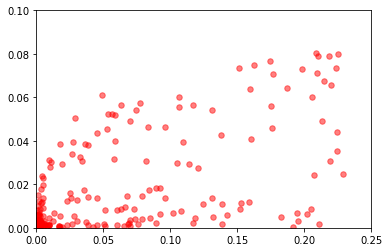

In [3]:
plt.scatter(heights_scores_df['Orc4 WT'],heights_scores_df['F485A,Y486A'],color='red',s=30,alpha=0.5)
plt.xlim(0,0.25)
plt.ylim(0,0.1)
plt.show()

In [4]:
df = heights_scores_df[['Orc4 WT','F485A,Y486A','sequence','WT_Score','F485A_Y486A_Score']].copy()

In [5]:
df.head()

,Orc4 WT,"F485A,Y486A",sequence,WT_Score,F485A_Y486A_Score
0,0.003413,0.002510,ATTTTTAAGTTTTGT,34.370372,56.206879
1,0.009110,0.004669,TTTTTTATGTTTAGA,36.436992,53.129439
2,0.019213,0.029398,ATATTTAAGTCTTGA,28.491761,44.530122
3,0.108084,0.007605,TTATTTATATTTAGT,35.518618,53.350595
4,0.175983,0.045903,CTTTTTATGTTTTCT,32.126723,60.139333


In [6]:
len(df)

222

In [7]:
low_heights = df.loc[(df['Orc4 WT']>0.05) & (df['F485A,Y486A'] < 0.02)]
high_heights = df.loc[(df['Orc4 WT']>0.05) & (df['F485A,Y486A'] > 0.04)]

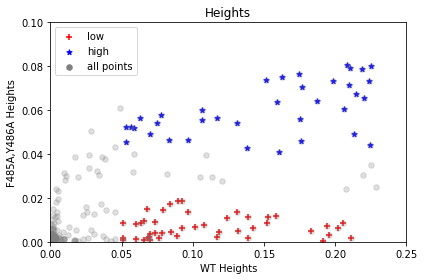

In [8]:
plt.scatter(low_heights['Orc4 WT'],low_heights['F485A,Y486A'],color='red',s=30,label='low',marker='+')
plt.scatter(high_heights['Orc4 WT'],high_heights['F485A,Y486A'],color='blue',s=30,label='high',marker='*')
plt.scatter(heights_scores_df['Orc4 WT'],heights_scores_df['F485A,Y486A'],color='gray',s=30,alpha=0.25,label='all points')

plt.xlabel('WT Heights')
plt.ylabel('F485A,Y486A Heights')

plt.xlim(0,0.25)
plt.ylim(0,0.1)
plt.title('Heights')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig('selected_heights.pdf')
plt.show()

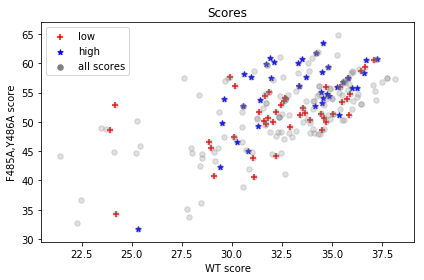

In [9]:
plt.scatter(low_heights['WT_Score'],low_heights['F485A_Y486A_Score'],color='red',s=30,label='low',marker='+')
plt.scatter(high_heights['WT_Score'],high_heights['F485A_Y486A_Score'],color='blue',s=30,label='high',marker='*')
plt.scatter(heights_scores_df['WT_Score'],heights_scores_df['F485A_Y486A_Score'],color='gray',s=30,alpha=0.25,label='all scores')
plt.title('Scores')
plt.xlabel('WT score')
plt.ylabel('F485A,Y486A score')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout()
plt.savefig('selected_scores.pdf')    
plt.show()

In [11]:
import pingouin

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
scores_heights_correlation = np.corrcoef(np.log(heights_scores_df['F485A,Y486A'].values),heights_scores_df['F485A_Y486A_Score'].values)
plt.scatter(np.log(heights_scores_df['F485A,Y486A']),heights_scores_df['F485A_Y486A_Score'],color='red',s=30,alpha=0.5)
plt.xlabel('F485A,Y486A heights')
plt.ylabel('F485A,Y486A scores')
plt.title('Heights-Scores $R^2$: '+str(scores_heights_correlation[0][1]**2)[0:10])

#plt.xlim(0,0.1)
plt.tight_layout()
plt.savefig('mutant_scores_vs_height.pdf')
plt.show()

In [ ]:
!pip install pingouin


  Using cached https://files.pythonhosted.org/packages/1c/dd/ad367a19a50d3eb00de595bf7b2bd205bf40b9d6129ef405d48de14714a1/pingouin-0.3.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/82/63/eee643cc97f2bd22da87420f28fb6cd4b940c25f6eff6c4d2ca2e24a7022/numpy-1.18.1-cp36-cp36m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/96/94/cd76305a69fff844e83655ed7b254835df4eddd5fc0e2d0eb2914501b36e/scipy-1.4.1-cp36-cp36m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/93/1b/4233e8fee68fc9d8d47e010fa481bf124db9ea6efe7f0a72a0c96c0a751b/matplotlib-3.2.0-cp36-cp36m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/91/64/b3c3e73bbec1ae6bee1b6a948bfaebef9c8a9b1e90756e8e1d110c6ff810/statsmodels-0.11.1.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
    100% |████████████████████████████████| 235kB 3.0MB/s ta 0:00:01
    

In [ ]:
import pingouin as pg

In [ ]:
x = np.log(heights_scores_df['F485A,Y486A'])
y = heights_scores_df['F485A_Y486A_Score']

In [ ]:
pg.corr(x, y)


In [ ]:
plt.scatter(heights_scores_df['Orc4 WT'],heights_scores_df['WT_Score'],color='red',s=30,alpha=0.5)
plt.xlabel('Orc4 WT heights')
plt.ylabel('WT scores')
#plt.title('Heights-Scores $R^2$: '+str(scores_heights_correlation[0][1]**2)[0:10])
plt.xlim(0,0.3)
plt.tight_layout()
plt.savefig('WT_score_vs_height.pdf')
plt.show()

In [ ]:
from scipy import stats
#print(stats.ks_2samp(heights_scores_df['Orc4 WT'].values, heights_scores_df['Orc4 WT'].values))
#print(stats.ks_2samp(np.log(heights_scores_df['F485A,Y486A'].values), heights_scores_df['F485A_Y486A_Score'].values))

In [ ]:
plt.hist(np.log(heights_scores_df['F485A,Y486A'].values),color='red',density=True,alpha=0.5)
plt.hist(heights_scores_df['F485A_Y486A_Score'].values,color='blue',density=True,alpha=0.5)
plt.show()